In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import MultipleLocator, plot

latency = pd.read_csv('latency.csv').apply(pd.to_numeric).values

请求延迟分布情况

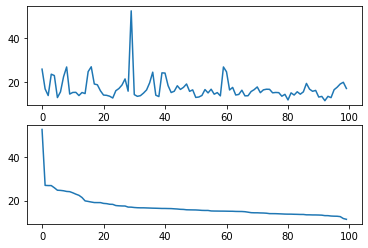

In [2]:
plt.subplot(211)
plt.plot(latency)
plt.subplot(212)
plt.plot(sorted(latency, reverse=True))
plt.show()

用排队论模型来拟合实测数据

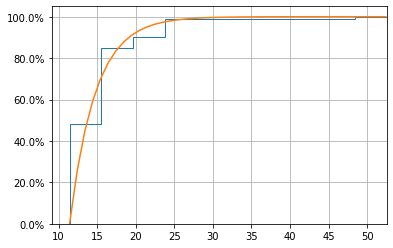

In [5]:
# 百分比换算
def to_percent(y, position):
    return str(100 * round(y, 2)) + "%"

plt.hist(latency, cumulative=True, histtype='step', weights=[1./ len(latency)] * len(latency))
fomatter = FuncFormatter(to_percent)
ax = plt.gca()
# ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(fomatter)
# 避免首列数据与纵轴重合，调整合适座标范围
x_min = max(min(latency) * 0.8, min(latency) - 5)
x_max = max(latency)
plt.xlim(x_min, x_max)

# 排队论模型
import numpy as np

# F(t)=1-e^(-1*a*t)
alpha = 0.3
X_qt = np.arange(min(latency), max(latency), 1.)
Y_qt = 1 - np.exp(alpha * (min(latency) - X_qt))
plt.plot(X_qt, Y_qt)

plt.grid()
plt.show()